In [ ]:
#veri setinindeki aykırı ve eksik gözlemleri gerekli istatistiksel yöntemlerle dolduracağız

# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [71]:
df=pd.read_csv("diabetes.csv")
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df_pregnancies = df["Pregnancies"]

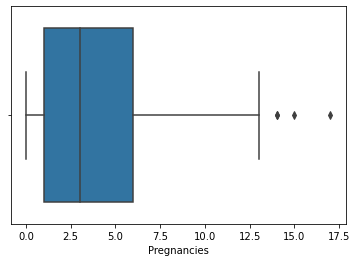

In [73]:
sns.boxplot(x = df_pregnancies);

In [74]:
Q1 = df_pregnancies.quantile(0.25)
Q3 = df_pregnancies.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [76]:
ust_sinir

13.5

In [77]:
(df_pregnancies < alt_sinir) | (df_pregnancies > ust_sinir)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Pregnancies, Length: 768, dtype: bool

In [78]:
aykiri_tf = ((df_pregnancies < alt_sinir) | (df_pregnancies > ust_sinir))

In [79]:
df_pregnancies[aykiri_tf]

88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64

In [80]:
df_pregnancies[aykiri_tf] = ust_sinir

<ipython-input-80-bc9cdf1eb7f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pregnancies[aykiri_tf] = ust_sinir


In [81]:
df_pregnancies[aykiri_tf]

88     13.5
159    13.5
298    13.5
455    13.5
Name: Pregnancies, dtype: float64

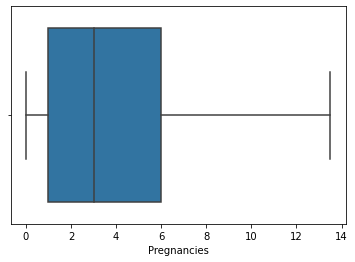

In [82]:
sns.boxplot(x = df_pregnancies);

In [83]:
df_glucose = df["Glucose"]

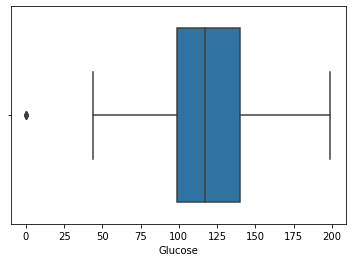

In [84]:
sns.boxplot(x = df_glucose);

In [85]:
Q1 = df_glucose.quantile(0.25)
Q3 = df_glucose.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [86]:
ust_sinir

202.125

In [87]:
type(df_glucose)

pandas.core.series.Series

In [90]:
df_glucose = pd.DataFrame(df_glucose)

In [91]:
df_glucose.shape

(768, 1)

In [92]:
df_glucose = df_glucose[~((df_glucose < (alt_sinir)) | (df_glucose > (ust_sinir))).any(axis = 1)]

In [93]:
df_glucose.shape

(763, 1)

In [99]:
df["Glucose"]=df_glucose

In [101]:
df.to_csv("diabetes1.csv")

# ikinci bölüm

In [8]:
df=pd.read_csv("diabetes1.csv")
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.drop(["Unnamed: 0"],axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0,33.6,0.627,50,1
1,1.0,85.0,66,29,0,26.6,0.351,31,0
2,8.0,183.0,64,0,0,23.3,0.672,32,1
3,1.0,89.0,66,23,94,28.1,0.167,21,0
4,0.0,137.0,40,35,168,43.1,2.288,33,1


In [9]:
df_bloodPressure = df["BloodPressure"]

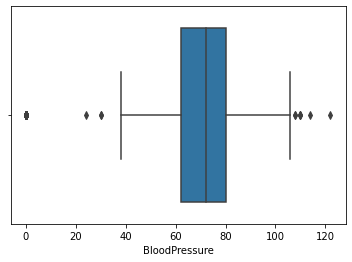

In [10]:
sns.boxplot(x = df_bloodPressure);

In [12]:
df_bloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [13]:
Q1 = df_bloodPressure.quantile(0.25)
Q3 = df_bloodPressure.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [14]:
alt_sinir

35.0

In [15]:
aykiri_tf = (df_bloodPressure < alt_sinir) 

In [17]:
df_bloodPressure[aykiri_tf].count()

38

In [18]:
df_bloodPressure[aykiri_tf] = alt_sinir

<ipython-input-18-52469cd5db9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bloodPressure[aykiri_tf] = alt_sinir


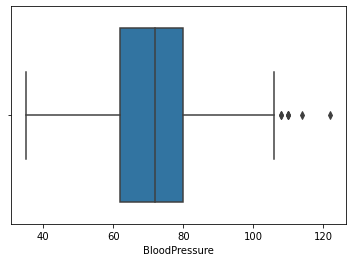

In [19]:
sns.boxplot(x = df_bloodPressure);

In [20]:
df_bloodPressure.describe()

count    768.000000
mean      70.727865
std       14.320604
min       35.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [21]:
df_skinThickness = df["SkinThickness"]

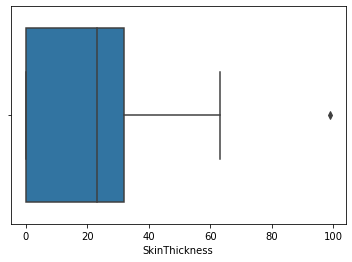

In [22]:
sns.boxplot(x = df_skinThickness);

In [23]:
df_skinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [24]:
Q1 = df_skinThickness.quantile(0.25)
Q3 = df_skinThickness.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [26]:
ust_sinir

80.0

In [27]:
df_skinThickness = pd.DataFrame(df_skinThickness)

In [28]:
df_skinThickness = df_skinThickness[~((df_skinThickness < (alt_sinir)) | (df_skinThickness > (ust_sinir))).
                                    any(axis = 1)]

In [29]:
df["SkinThickness"]=df_skinThickness

In [58]:
#insülin değeri sıfır olabildiği için alt sınırda herhangi bir işlem yapmayacğız
#insülin değeri çok fazla değerler olabileceği için aykırı gözlem olarak kabul etmedik

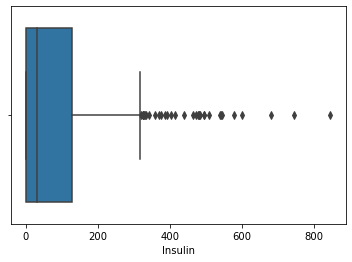

In [30]:
df_insulin = df["Insulin"]
sns.boxplot(x = df_insulin);

In [31]:
Q1 = df_insulin.quantile(0.25)
Q3 = df_insulin.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [33]:
ust_sinir

318.125

In [34]:
alt_sinir

-190.875

In [35]:
df_insulin.describe().T

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


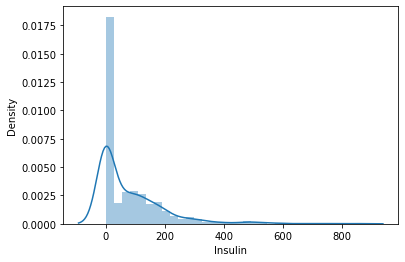

In [36]:
sns.distplot(df.Insulin);

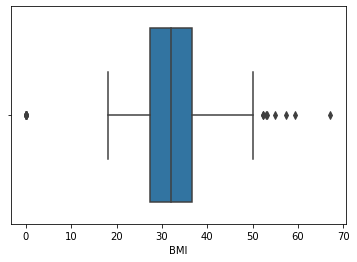

In [37]:
df_bmi = df["BMI"]
sns.boxplot(x = df_bmi);

In [38]:
Q1 = df_bmi.quantile(0.25)
Q3 = df_bmi.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [44]:
alt_sinir

13.35

In [40]:
ust_sinir

50.550000000000004

In [42]:
df_bmi.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [46]:
aykiri_tf = (df_bmi < alt_sinir) 

In [47]:
df_bmi[aykiri_tf].count()

11

In [48]:
df_bmi[aykiri_tf] = alt_sinir

<ipython-input-48-d5be18b7bc0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi[aykiri_tf] = alt_sinir


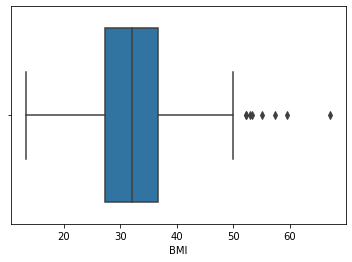

In [49]:
sns.boxplot(x = df_bmi);

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64,0.0,0,23.3,0.672,32,1
3,1.0,89.0,66,23.0,94,28.1,0.167,21,0
4,0.0,137.0,40,35.0,168,43.1,2.288,33,1


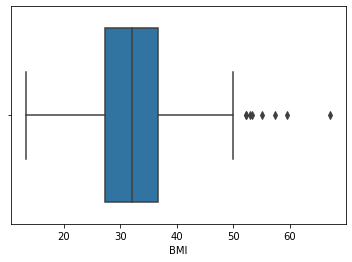

In [51]:
df_diabetesPedigreeFunction = df["DiabetesPedigreeFunction"]
sns.boxplot(x = df_bmi);

In [52]:
Q1 = df_diabetesPedigreeFunction.quantile(0.25)
Q3 = df_diabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [53]:
alt_sinir

-0.32999999999999996

In [54]:
ust_sinir

1.2

In [55]:
df_diabetesPedigreeFunction.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


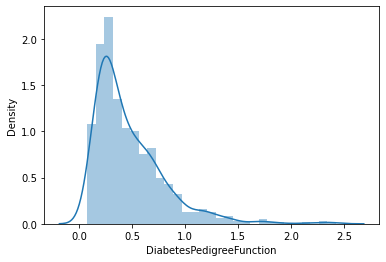

In [56]:
sns.distplot(df.DiabetesPedigreeFunction);

In [57]:
#sorun çıkartmaz

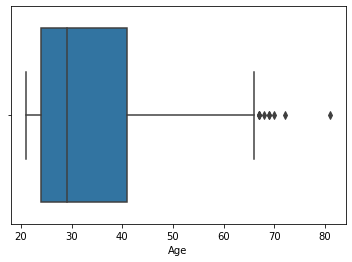

In [59]:
df_age = df["Age"]
sns.boxplot(x = df_age);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


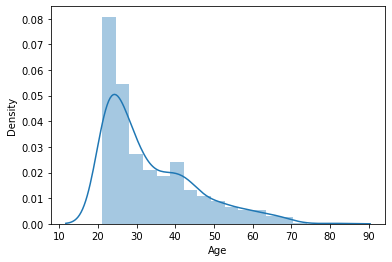

In [60]:
sns.distplot(df.Age);

In [67]:
df.to_csv("diabetes2.csv")

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.0000,6.00000,13.50
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,768.0,70.727865,14.320604,35.000,62.00000,72.0000,80.00000,122.00
SkinThickness,767.0,20.434159,15.708524,0.000,0.00000,23.0000,32.00000,63.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,32.183789,7.240770,13.350,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
